1 

Estudinates
_______________________________________________________________________________

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df_asig = pd.read_csv('../1_GENERADOR/asignaturas.csv')
df_est = pd.read_csv('../1_GENERADOR/estudiantes.csv')
df_not = pd.read_csv('../1_GENERADOR/notas.csv')

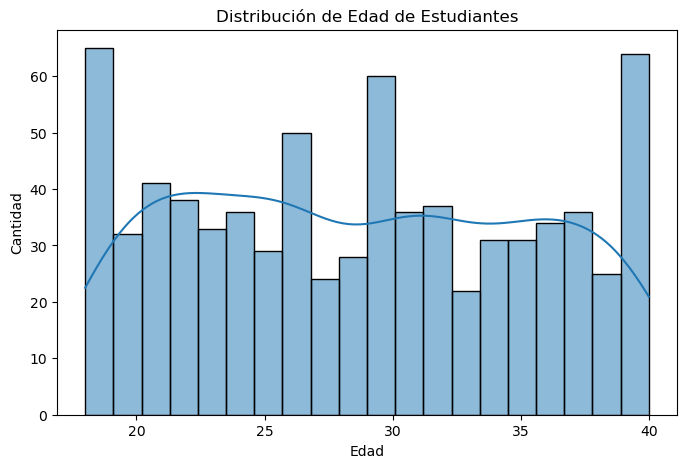

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df_est['edad'], bins=20, kde=True)
plt.title('Distribución de Edad de Estudiantes')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

C:\Users\Deusto\AppData\Local\Temp\ipykernel_4796\3680780956.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_est, x='sexo', palette='pastel')


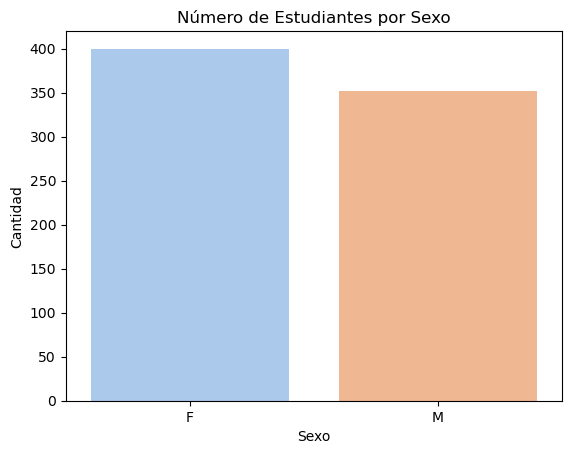

In [9]:
sns.countplot(data=df_est, x='sexo', palette='pastel')
plt.title('Número de Estudiantes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()


C:\Users\Deusto\AppData\Local\Temp\ipykernel_22068\140569551.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nota_media_sexo.index, y=nota_media_sexo.values, palette='Set1')


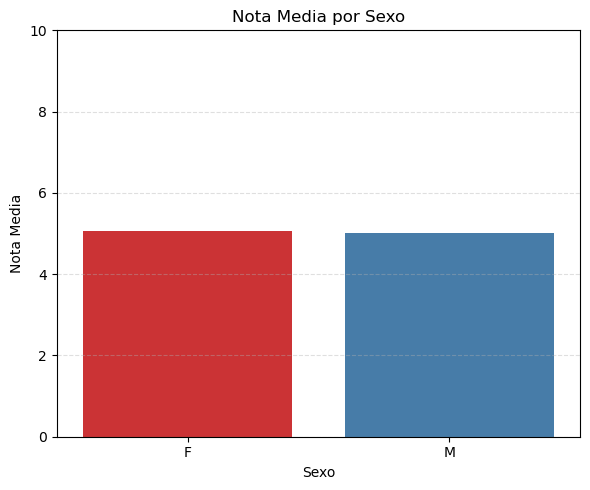

In [10]:
df_merged = df_not.merge(df_est[['id_estudiante', 'sexo']], on='id_estudiante')

# Eliminar posibles nulos
df_merged = df_merged.dropna(subset=['nota', 'sexo'])

# Calcular nota media por sexo
nota_media_sexo = df_merged.groupby('sexo')['nota'].mean()

# Graficar
plt.figure(figsize=(6, 5))
sns.barplot(x=nota_media_sexo.index, y=nota_media_sexo.values, palette='Set1')
plt.title('Nota Media por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Nota Media')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

C:\Users\Deusto\AppData\Local\Temp\ipykernel_4796\590958155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ciudades.index, y=top_ciudades.values, palette='muted')


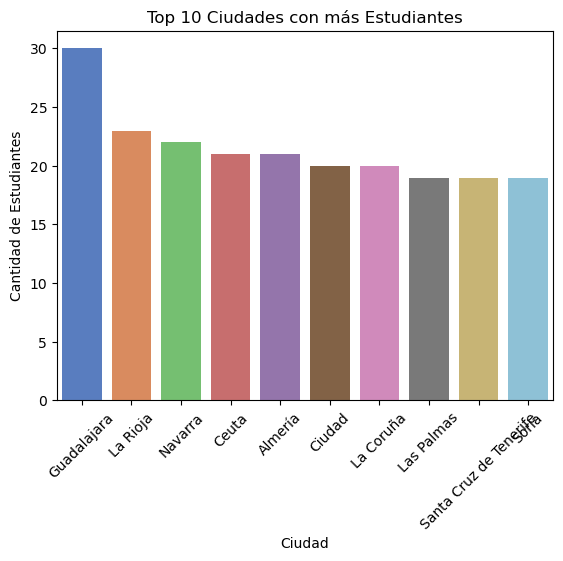

In [10]:
top_ciudades = df_est['ciudad'].value_counts().nlargest(10)
sns.barplot(x=top_ciudades.index, y=top_ciudades.values, palette='muted')
plt.title('Top 10 Ciudades con más Estudiantes')
plt.xticks(rotation=45)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Estudiantes')
plt.show()


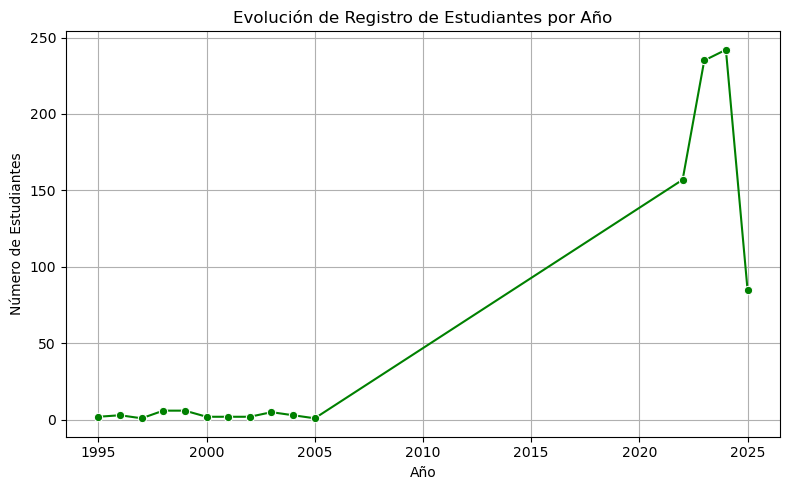

In [3]:
df_est['fecha_registro'] = pd.to_datetime(df_est['fecha_registro'], errors='coerce')
df_est['año_registro'] = df_est['fecha_registro'].dt.year

registro_anual = df_est['año_registro'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.lineplot(x=registro_anual.index, y=registro_anual.values, marker='o', color='green')
plt.title('Evolución de Registro de Estudiantes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.tight_layout()
plt.show()

2:

ASignaturas
_______________________________________________________________________________

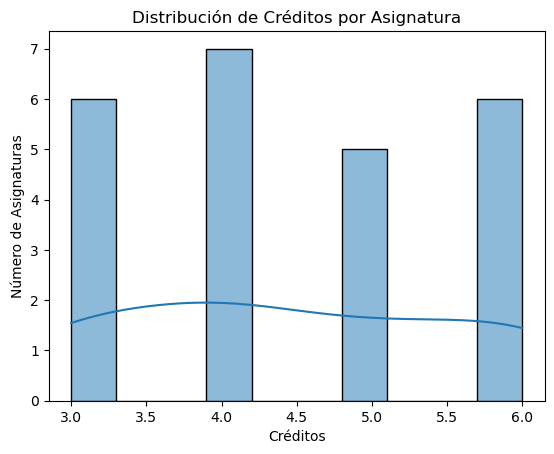

In [11]:
sns.histplot(df_asig['creditos'], bins=10, kde=True)
plt.title('Distribución de Créditos por Asignatura')
plt.xlabel('Créditos')
plt.ylabel('Número de Asignaturas')
plt.show()


C:\Users\Deusto\AppData\Local\Temp\ipykernel_22068\760103213.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nota_media_departamento.values, y=nota_media_departamento.index, palette='Spectral')


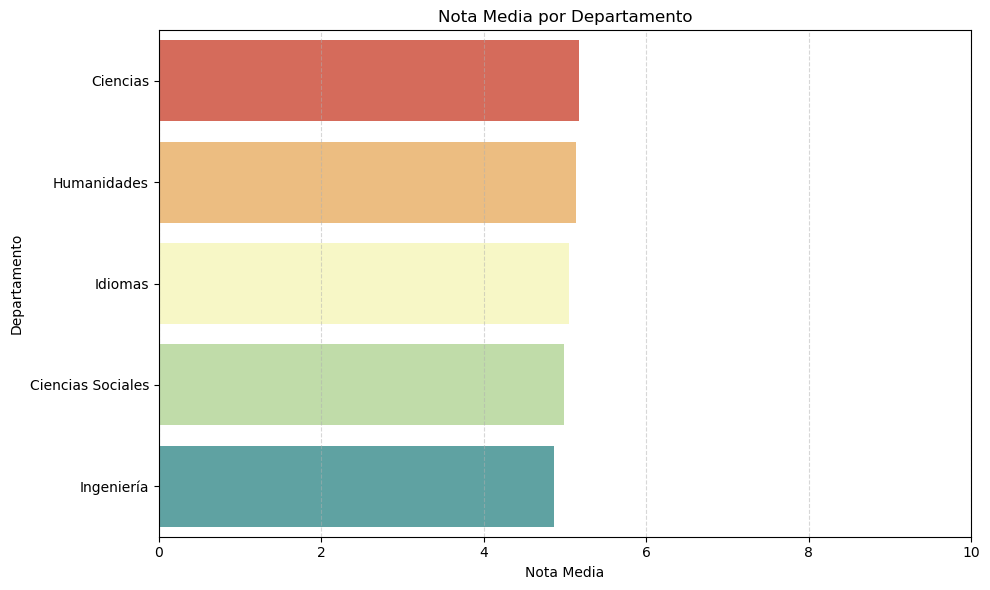

In [4]:
df_merged = df_not.merge(df_asig[['id_asignatura', 'departamento']], on='id_asignatura')

# Eliminar posibles nulos
df_merged = df_merged.dropna(subset=['departamento', 'nota'])

# Calcular nota media por departamento
nota_media_departamento = df_merged.groupby('departamento')['nota'].mean().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=nota_media_departamento.values, y=nota_media_departamento.index, palette='Spectral')
plt.title('Nota Media por Departamento')
plt.xlabel('Nota Media')
plt.ylabel('Departamento')
plt.xlim(0, 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

3:

Notas

________________________________________________________________________________

C:\Users\Deusto\AppData\Local\Temp\ipykernel_4796\3261422659.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, y='nombre_asignatura', x='n_suspensos', palette='Reds_r')


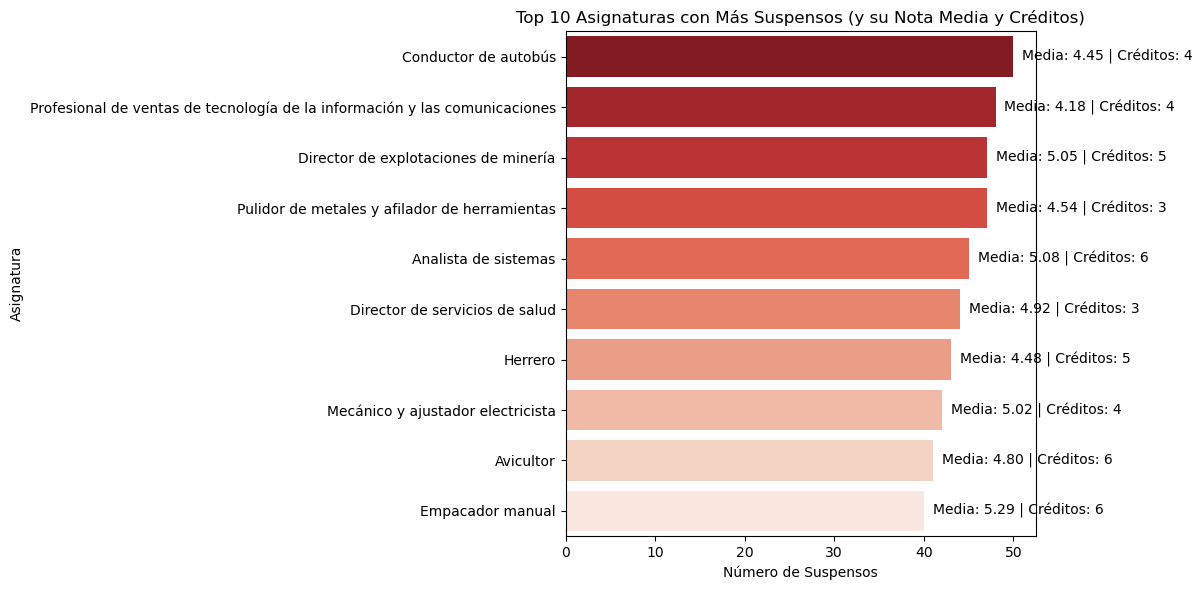

In [17]:


# Asegurar tipos
df_not['id_asignatura'] = pd.to_numeric(df_not['id_asignatura'], errors='coerce')
df_not['nota'] = pd.to_numeric(df_not['nota'], errors='coerce')
df_asig['id_asignatura'] = pd.to_numeric(df_asig['id_asignatura'], errors='coerce')

# Calcular suspensos
df_suspensos = df_not[df_not['nota'] < 5]
suspensos_count = df_suspensos['id_asignatura'].value_counts().reset_index()
suspensos_count.columns = ['id_asignatura', 'n_suspensos']

# Calcular nota media por asignatura
notas_media = df_not.groupby('id_asignatura')['nota'].mean().reset_index()
notas_media.columns = ['id_asignatura', 'nota_media']

# Unir todo con los datos de asignaturas
info_asig = df_asig[['id_asignatura', 'nombre_asignatura', 'creditos']]
df_resultado = suspensos_count.merge(notas_media, on='id_asignatura')
df_resultado = df_resultado.merge(info_asig, on='id_asignatura')

# Ordenar por número de suspensos y quedarte con el top
df_top = df_resultado.sort_values(by='n_suspensos', ascending=False).head(10)

# Graficar
plt.figure(figsize=(12,6))
sns.barplot(data=df_top, y='nombre_asignatura', x='n_suspensos', palette='Reds_r')

# Añadir etiquetas con nota media y créditos
for index, row in df_top.iterrows():
    plt.text(row.n_suspensos + 1, index, f"Media: {row.nota_media:.2f} | Créditos: {row.creditos}", va='center')

plt.title('Top 10 Asignaturas con Más Suspensos (y su Nota Media y Créditos)')
plt.xlabel('Número de Suspensos')
plt.ylabel('Asignatura')
plt.tight_layout()
plt.show()


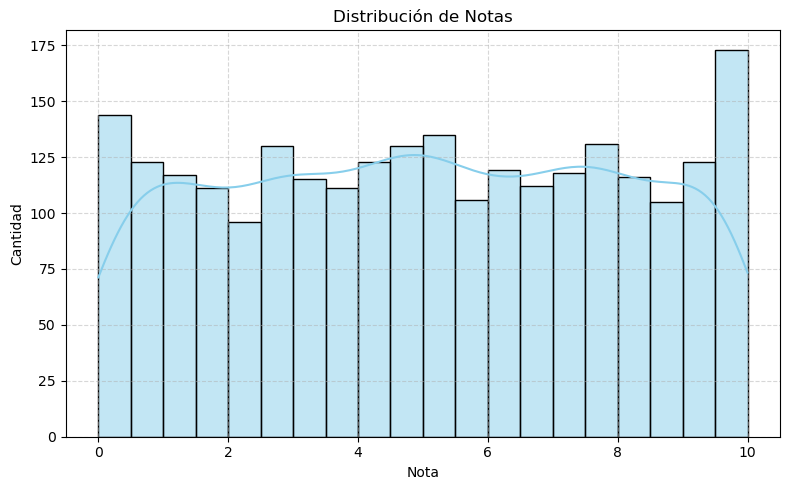

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df_not['nota'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Notas')
plt.xlabel('Nota')
plt.ylabel('Cantidad')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Deusto\AppData\Local\Temp\ipykernel_22068\2604353621.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


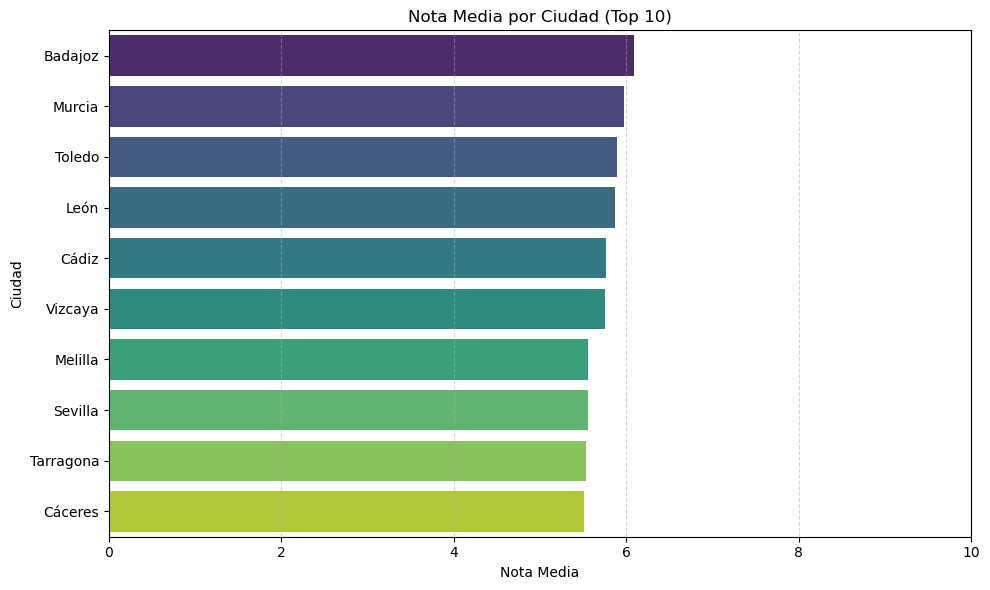

In [11]:
df_merged = df_not.merge(df_est[['id_estudiante', 'ciudad']], on='id_estudiante')

# Eliminar filas con ciudad o nota nula
df_merged = df_merged.dropna(subset=['nota', 'ciudad'])

# Calcular nota media por ciudad
nota_media_ciudad = df_merged.groupby('ciudad')['nota'].mean().sort_values(ascending=False)

# Mostrar solo las 10 ciudades con mejor promedio (puedes ajustar)
top_cities = nota_media_ciudad.head(10)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Nota Media por Ciudad (Top 10)')
plt.xlabel('Nota Media')
plt.ylabel('Ciudad')
plt.xlim(0, 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()